Лабораторная работа №1.

In [5]:
# Подгружаю библиотеки для работы с изображениями
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, mean_squared_error

Шаг первый. Загрузка изображения в оттенках серого.

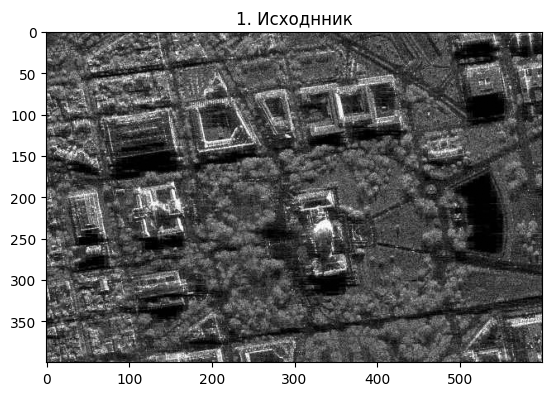

In [12]:
image = cv2.imread('sar_1_gray.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image, cmap='gray')
plt.title('1. Исходнник')
plt.show()

Шаг второй. Построить гистограмму полученного изображения.

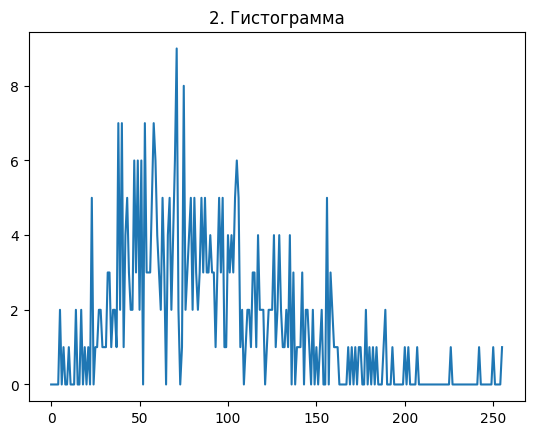

In [14]:
b = image[:,0]
histSize = 256
histRange = (0, 256)
b_hist = cv2.calcHist([b], [0], None, [histSize], histRange, False)

plt.plot(b_hist)
plt.title('2. Гистограмма')
plt.show()

Шаг третий. Реализация алгоритма гамма коррекции с параметром гамма <1, >1. (В моём случае 0.1 и 3.0)

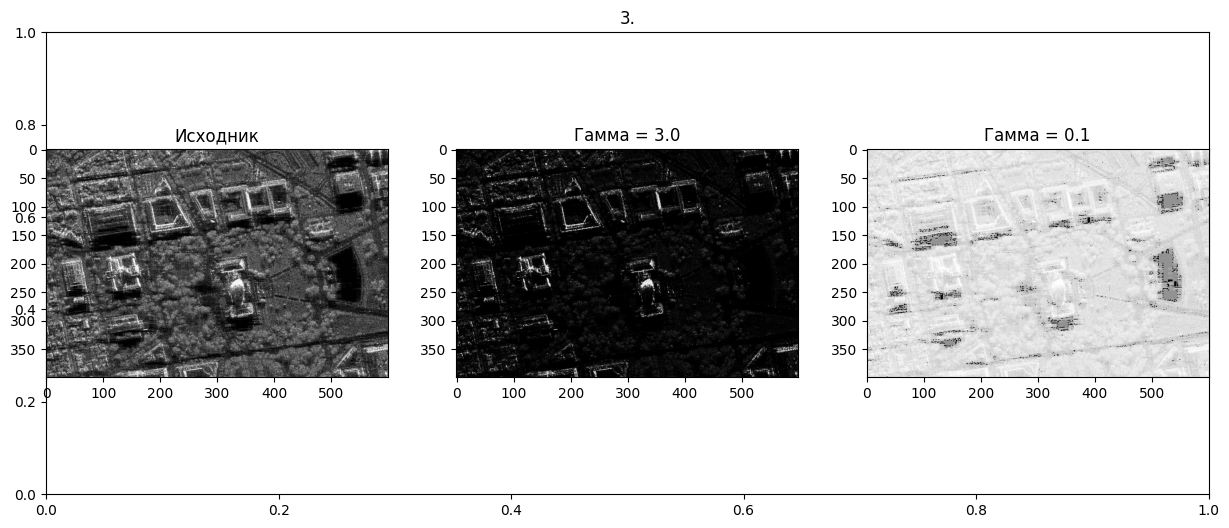

In [15]:
gamma = 3.0 
gamma2 = 0.1

normalized = image.astype(np.float32) / 255.0
gamma_corrected = np.power(normalized, gamma)
image_gamma = np.uint8(gamma_corrected * 255)

normalized2 = image.astype(np.float32) / 255.0
gamma2_corrected = np.power(normalized2, gamma2)
image_gamma2 = np.uint8(gamma2_corrected * 255)

plt.figure(figsize=(15,6))
plt.title('3.')

plt.subplot(1,3,1)
plt.imshow(image, cmap='gray')
plt.title('Исходник')

plt.subplot(1,3,2)
plt.imshow(image_gamma, cmap='gray')
plt.title(f'Гамма = {gamma}')

plt.subplot(1,3,3)
plt.imshow(image_gamma2, cmap='gray')
plt.title(f'Гамма = {gamma2}')

plt.show()

Шаг четвертый. Сравнить исходное изображение, скорректированное при помощи гамма-фильтра. вывести MSE, SSIM.

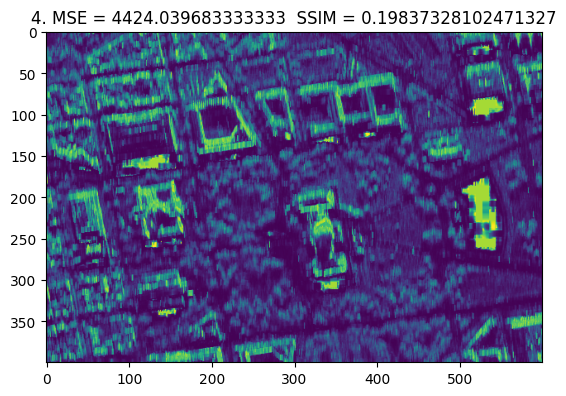

In [ ]:
(ssim, diff) = structural_similarity(image, image_gamma, full=True, channel_axis=-1)
mse = mean_squared_error(image, image_gamma)

diff = (diff * 255).astype("uint8")

plt.imshow(diff)
plt.title(f'4. MSE = {mse}  SSIM = {format(ssim)}') # я решил, что удобнее будет видеть показатели не в терминале, а сразу рядом с картинкой
plt.show()

Шаг пятый. Реализовать алгоритм статистической цветокоррекции на основе статистики eq_gray.

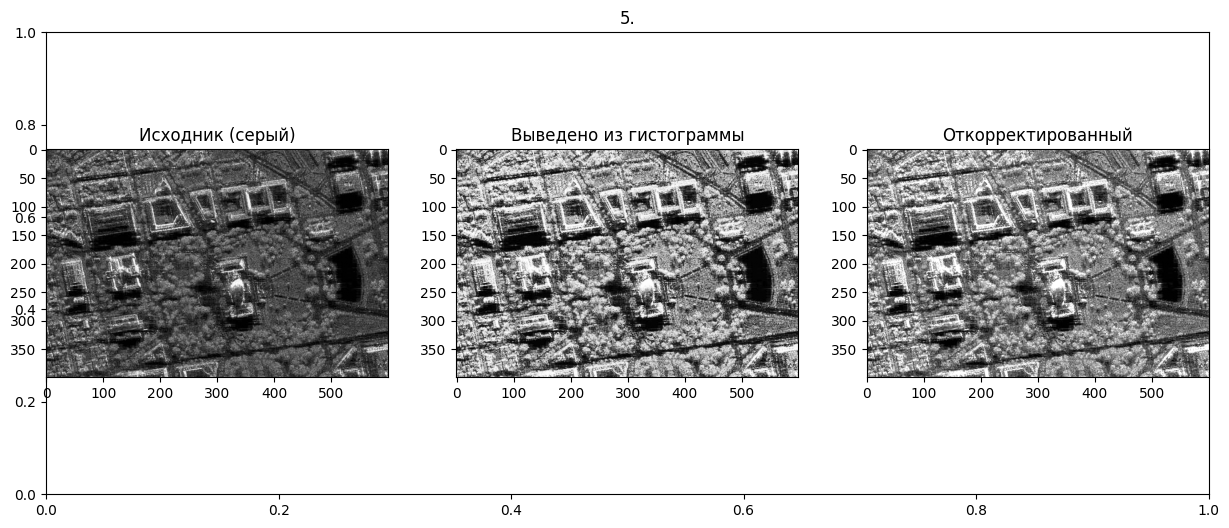

In [22]:
eq_gray = cv2.equalizeHist(image) # Получаем статистику 

mean_src, std_src = image.mean(), image.std()
mean_ref, std_ref = eq_gray.mean(), eq_gray.std()

gray_corrected = (image - mean_src) / (std_src + 1e-8) * std_ref + mean_ref
gray_corrected = np.clip(gray_corrected, 0, 255).astype(np.uint8)

plt.figure(figsize=(15,6))
plt.title('5.')

plt.subplot(1,3,1)
plt.imshow(image, cmap="gray")
plt.title('Исходник (серый)')

plt.subplot(1,3,2)
plt.imshow(eq_gray, cmap="gray")
plt.title('Выведено из гистограммы')

plt.subplot(1,3,3)
plt.imshow(gray_corrected, cmap="gray")
plt.title('Откорректированный')


plt.show()

Шаг шестой. Протестировать работу алгоритмов пороговой фильтрации с различными параметрами. (В моём случае 50-200 с шагом 50)

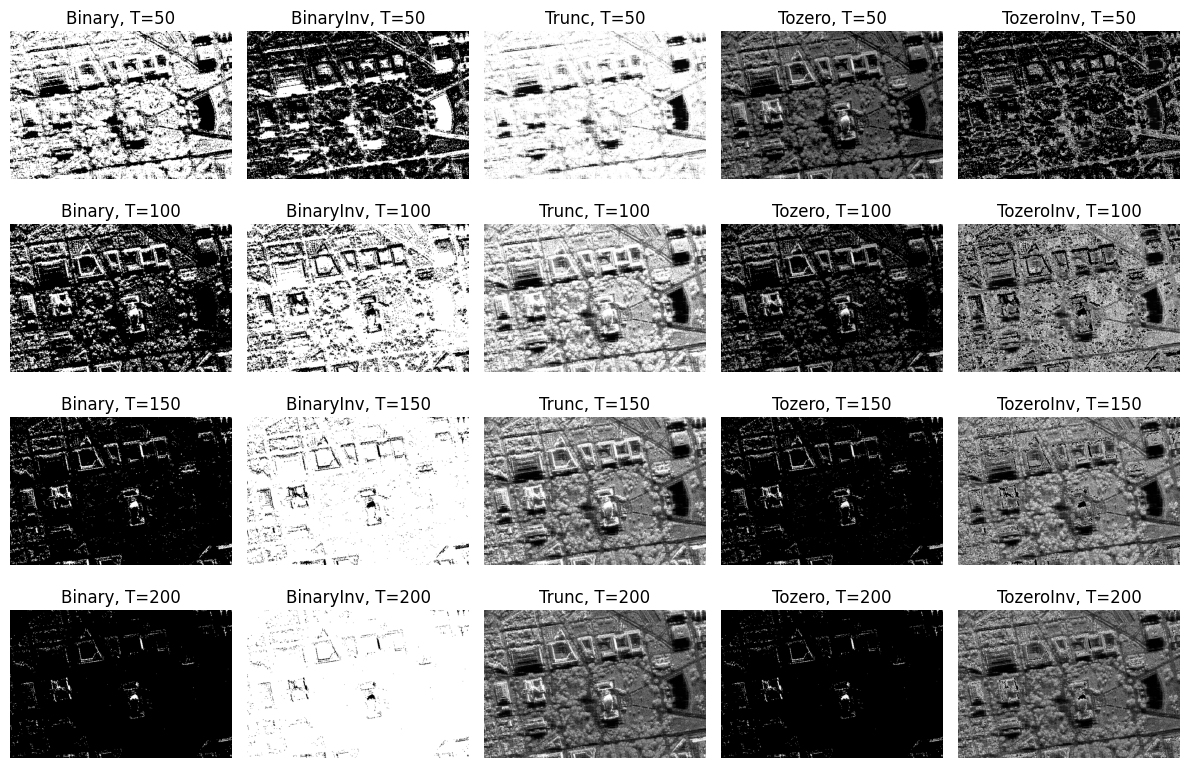

In [ ]:
thresh_values = [50, 100, 150, 200]
methods = [
    ("Binary", cv2.THRESH_BINARY),
    ("BinaryInv", cv2.THRESH_BINARY_INV),
    ("Trunc", cv2.THRESH_TRUNC),
    ("ToZero", cv2.THRESH_TOZERO),
    ("ToZeroInv", cv2.THRESH_TOZERO_INV),
]

plt.figure(figsize=(12, 8))

i = 1
for t in thresh_values:
    for name, method in methods:
        _, thresh = cv2.threshold(image, t, 255, method)
        plt.subplot(len(thresh_values), len(methods), i)
        plt.imshow(thresh, cmap='gray')
        plt.title(f"{name}, T={t}")
        plt.axis("off")
        i += 1
plt.tight_layout()
plt.show()